In [21]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

### Zillow Home Value Index - zipcode

In [2]:
zhvi = gpd.read_file('../data/finalFiles/zipcode_final.shp')
print (zhvi.shape)
zhvi.head()

(788, 40)


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,2000,2001,...,2022,2023,Shape_Leng,Shape_Area,1in100,1in500,%Change,meanEle,distances,geometry
0,73221,80,34787,zip,FL,FL,Winter Garden,"Orlando-Kissimmee-Sanford, FL",177263.267129,187643.480413,...,546216.226622,553544.350791,1.145243,0.018612,0.174195,0.219499,2.122725,1230.432775,92775.538551,"MULTIPOLYGON (((639845.336 505019.091, 639686...."
1,72362,96,33024,zip,FL,FL,Pembroke Pines,"Miami-Fort Lauderdale-Pompano Beach, FL",95537.304993,108702.206559,...,407862.981147,424388.837688,0.249723,0.002777,0.234319,0.422797,3.442127,236.940559,13021.360223,"POLYGON ((778192.803 232326.980, 778194.403 23..."
2,72530,133,33311,zip,FL,FL,Fort Lauderdale,"Miami-Fort Lauderdale-Pompano Beach, FL",54515.456786,62814.582286,...,299024.079330,315607.724772,0.251871,0.002465,0.258111,0.433085,4.789326,103.333322,7071.177737,"POLYGON ((784536.755 246245.190, 784537.439 24..."
3,72361,145,33023,zip,FL,FL,Miramar,"Miami-Fort Lauderdale-Pompano Beach, FL",80083.825376,90701.811936,...,382882.877666,398303.546514,0.239457,0.002093,0.234619,0.422255,3.973583,142.074427,9509.542271,"POLYGON ((782275.929 226797.116, 782287.615 22..."
4,72578,149,33411,zip,FL,FL,NaN,"Miami-Fort Lauderdale-Pompano Beach, FL",121188.331699,131454.610877,...,440075.865111,447611.669489,0.545057,0.008506,0.406732,0.582441,2.693521,185.784966,16765.086881,"POLYGON ((783714.960 311202.948, 783714.419 31..."


In [ ]:
'''# use regplot

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(zhvi['meanEle'], zhvi['%Change'])

# use line_kws to set line label for legend
ax = sbn.regplot(x = "meanEle",
            y = "%Change", 
            ci = None,
            data = zhvi, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},
                scatter_kws={'s':4})
#print (r_value)
#print (p_value)
# plot legend
ax.legend()
plt.title('Simple Linear Regression between ')
plt.show()
'''

(array([506., 196.,  57.,  13.,   7.,   4.,   0.,   3.,   1.,   1.]),
 array([  44.71655064,  726.87064984, 1409.02474903, 2091.17884822,
        2773.33294741, 3455.48704661, 4137.6411458 , 4819.79524499,
        5501.94934418, 6184.10344338, 6866.25754257]),
 <BarContainer object of 10 artists>)

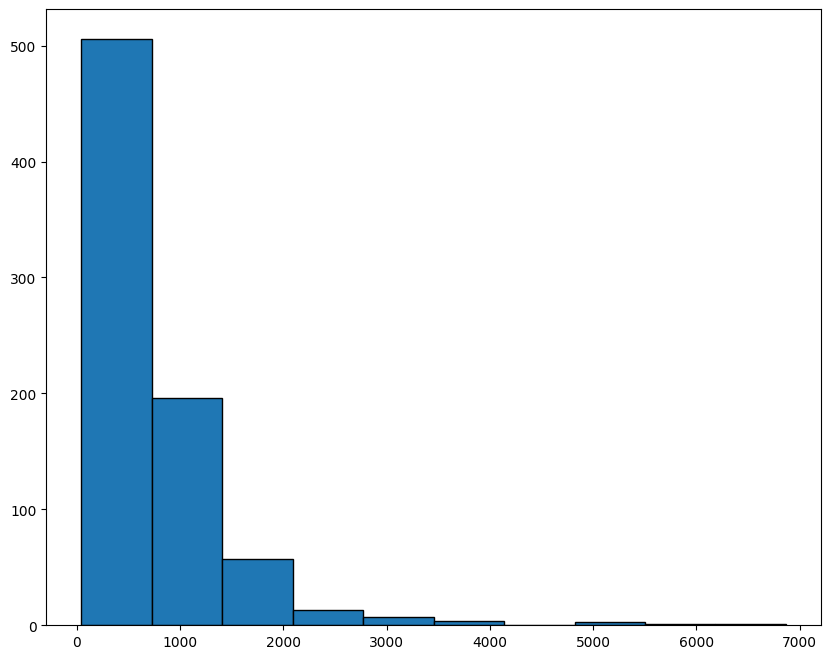

In [48]:
plt.hist(zhvi['meanEle'], bins=10, edgecolor='black')

NameError: name 'X' is not defined

-0.17122723432485387


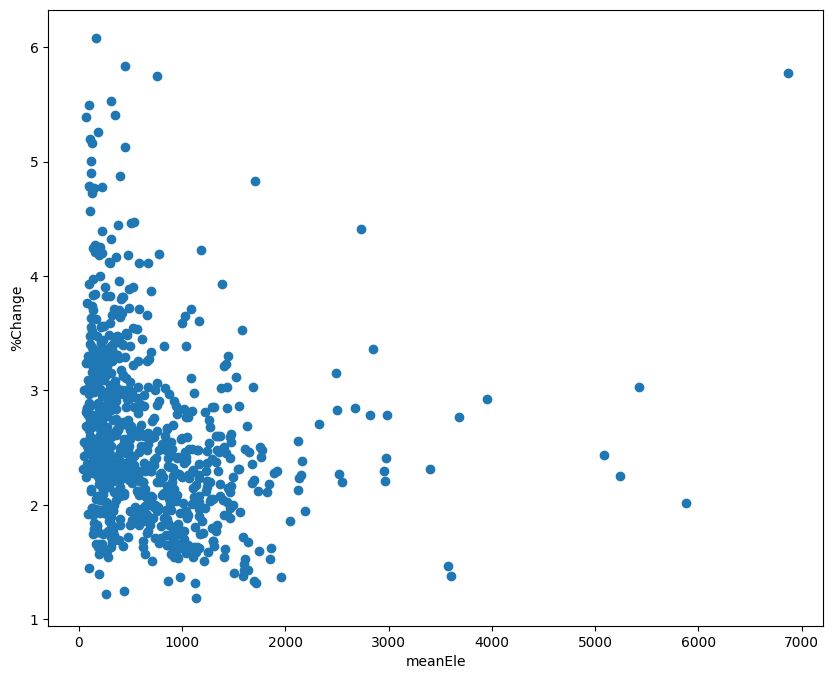

In [31]:
#numpy function to check correlation 
print (zhvi['%Change'].corr(zhvi['meanEle']))
# scatterplots
## Mean elevation and Housing price % change
plt.scatter(zhvi['meanEle'], zhvi['%Change'])
plt.xlabel('meanEle')
plt.ylabel('%Change')
plt.show()

0.3201221150360707


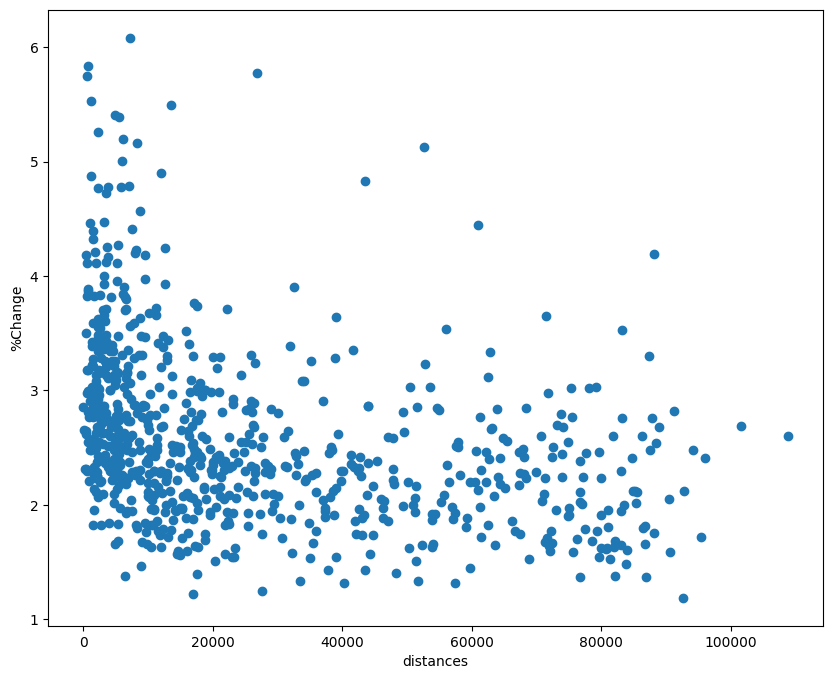

In [32]:
#numpy function to check correlation 
print (zhvi['distances'].corr(zhvi['meanEle']))
## Distance to Coast and Housing price % change
plt.scatter(zhvi['distances'], zhvi['%Change'])
plt.xlabel('distances')
plt.ylabel('%Change')
plt.show()

-0.08600239599402847


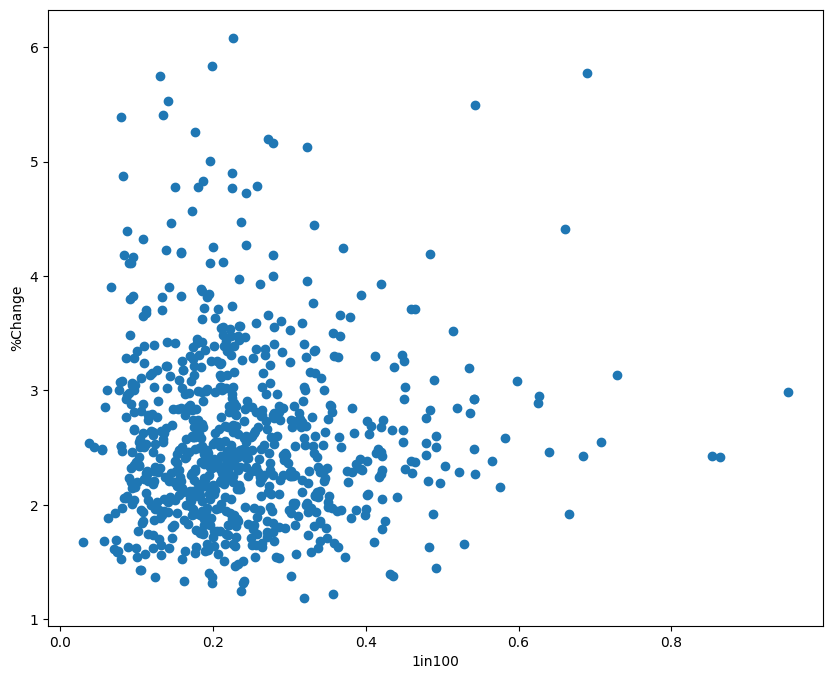

In [33]:
#numpy function to check correlation 
print (zhvi['1in100'].corr(zhvi['meanEle']))
## Distance to Coast and Housing price % change
plt.scatter(zhvi['1in100'], zhvi['%Change'])
plt.xlabel('1in100')
plt.ylabel('%Change')
plt.show()

-0.16126773138283446


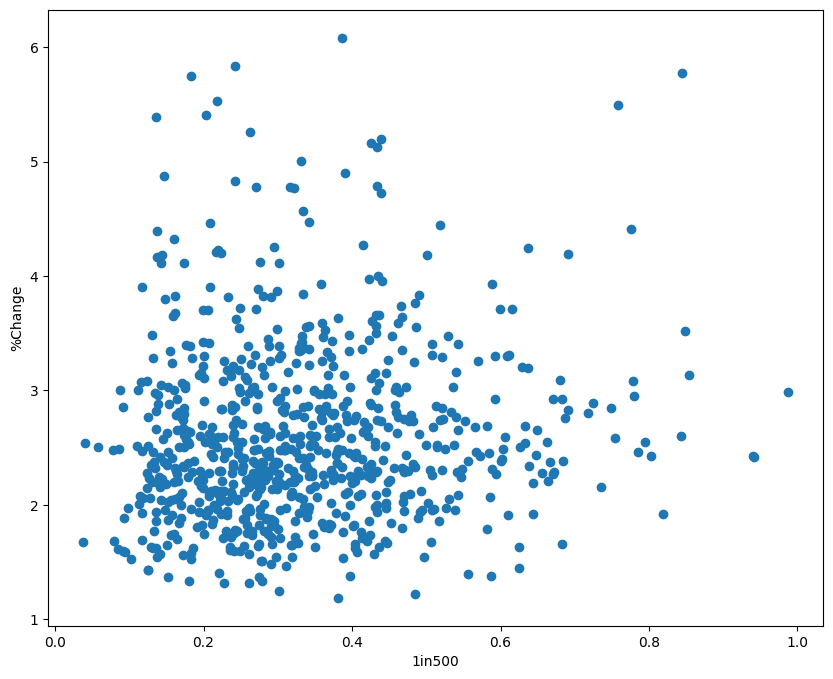

In [34]:
#numpy function to check correlation 
print (zhvi['1in500'].corr(zhvi['meanEle']))
## Distance to Coast and Housing price % change
plt.scatter(zhvi['1in500'], zhvi['%Change'])
plt.xlabel('1in500')
plt.ylabel('%Change')
plt.show()

In [ ]:
## spatial autocorrelation: not now

### 1. Linear Regression

In [64]:
###scikit learn
new_df = zhvi[['1in100', '1in500',
       'meanEle', 'distances', '%Change']]

x = new_df.iloc[:,0:4].values
y= new_df.iloc[:,-1].values

In [63]:
new_df
#x

,1in100,1in500,meanEle,distances,%Change
0,0.174195,0.219499,1230.432775,92775.538551,2.122725
1,0.234319,0.422797,236.940559,13021.360223,3.442127
2,0.258111,0.433085,103.333322,7071.177737,4.789326
3,0.234619,0.422255,142.074427,9509.542271,3.973583
4,0.406732,0.582441,185.784966,16765.086881,2.693521
...,...,...,...,...,...
783,0.174749,0.373744,1410.222642,6942.088979,3.211715
784,0.243291,0.334505,947.643892,84695.450553,2.409080
785,0.483845,0.691080,778.715373,88201.397116,4.193366
786,0.331970,0.396406,1429.489831,77611.785950,2.457635


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

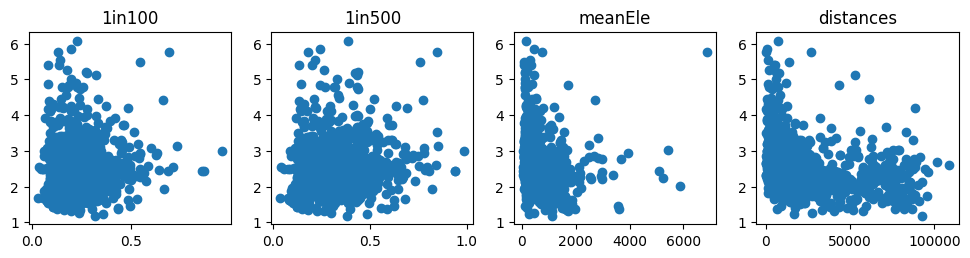

In [66]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(12, 2.5))

ax1.scatter(new_df['1in100'], new_df['%Change'])
ax1.set_title("1in100")
ax2.scatter(new_df['1in500'], new_df['%Change'])
ax2.set_title("1in500")
ax3.scatter(new_df['meanEle'], new_df['%Change'])
ax3.set_title("meanEle")
ax4.scatter(new_df['distances'], new_df['%Change'])
ax4.set_title("distances")

plt.show()

### 2. Checking Multicollinearity

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [70]:
pd.DataFrame({'vif': vif}, index=new_df.columns[0:4]).T

,1in100,1in500,meanEle,distances
vif,64.635412,61.786046,1.935172,2.175102


#### note: chances of multicollinearity between 1in100 and 1in500

<Axes: >

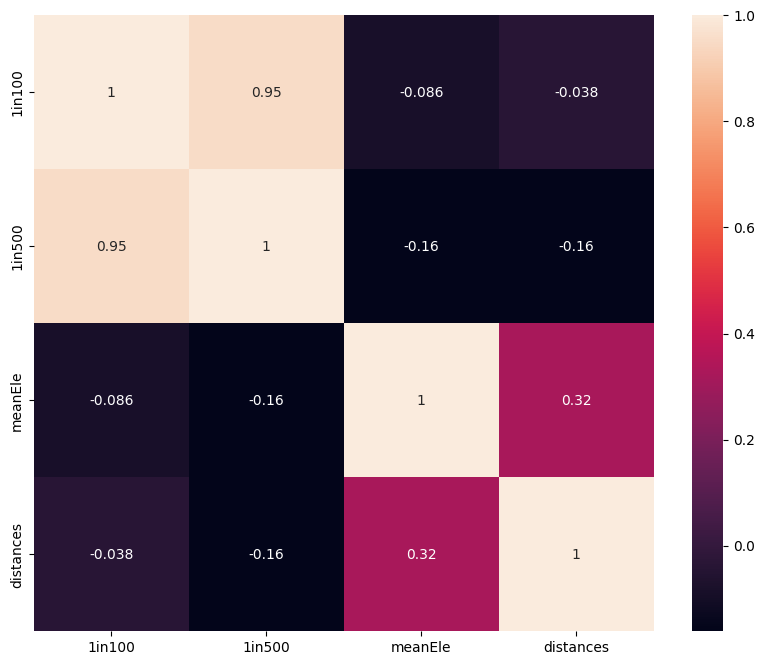

In [73]:
# Another Technique, correlation matrix 
sns.heatmap(new_df.iloc[:,0:4].corr(),annot=True)

#### note: the correlation between 1in 100 and 1in500 is 0.95.

## 3. Normality of Residual

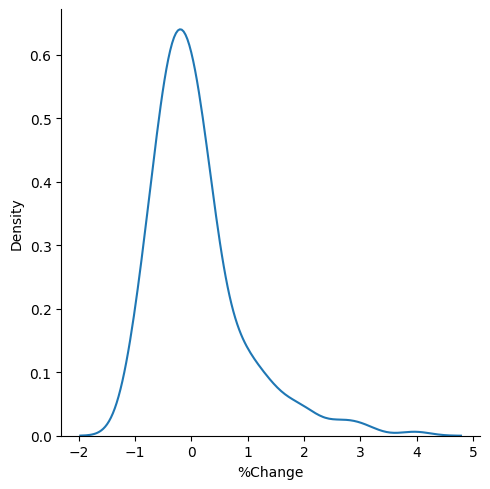

In [24]:
sns.displot(residual,kind='kde')

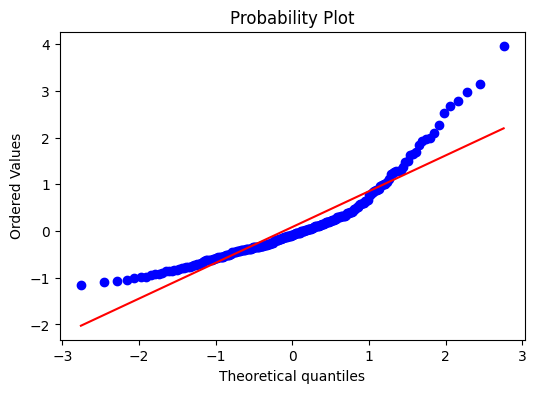

In [25]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity

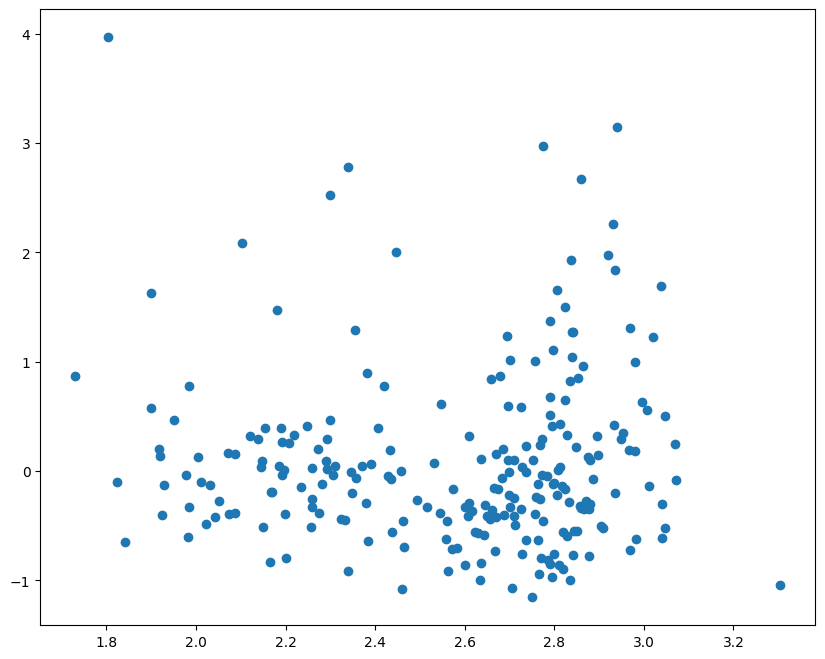

In [26]:
plt.scatter(y_pred,residual)

## 5. Autocorrelation of Residuals

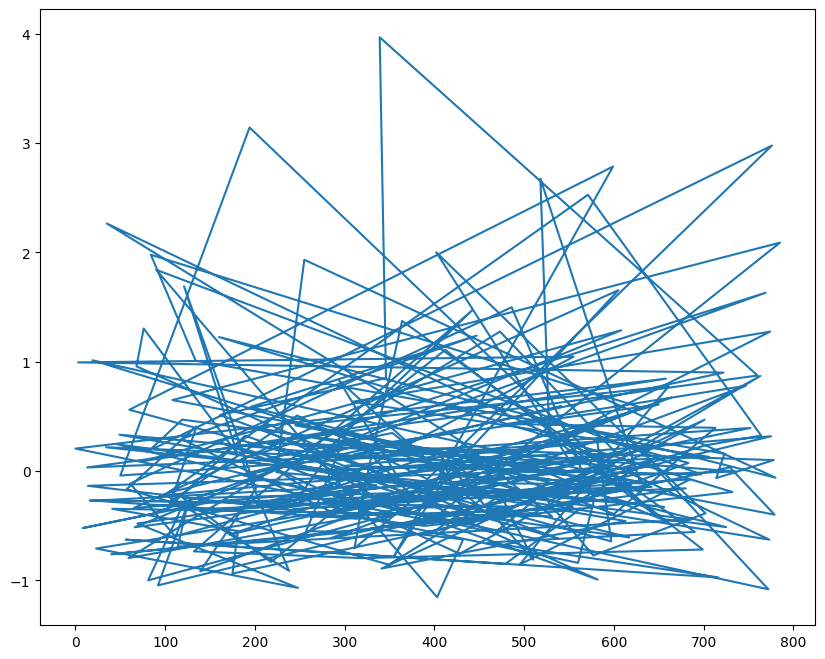

In [27]:
plt.plot(residual)

In [44]:
type(new_df)
new_df.dtypes

1in100       float64
1in500       float64
%Change      float64
meanEle      float64
distances    float64
dtype: object

In [11]:
import statsmodels.api as sm #OLS
import statsmodels.formula.api as smf

In [20]:
# Regression Model
X = zhvi[['1in100', '1in500','meanEle', 'distances']]
Y = zhvi['%Change']
model = sm.OLS(Y,X).fit()

In [23]:
print (model.params)
print (model.tvalues)

In [47]:
formula = "%Change ~ 1in100 + 1in500 + meanEle + distances"
model1 = smf.ols(formula = '%Change ~ 1in100', data = new_df)
# Extract the residuals
#model_residual = model.resid

AssertionError: 

In [46]:
x =  np.arange(2, 11).reshape(3,3)
x

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])